<a href="https://colab.research.google.com/github/felipe24I/Entregas/blob/main/Serie_de_fourier_trigonometrica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a0= 
1.00000000000000
an = 
⎧                  1.0                     for n = 0
⎪                                                   
⎨0.636619772367581⋅sin(1.5707963267949⋅n)           
⎪────────────────────────────────────────  otherwise
⎩                   n                               
bn = 
0
f(t)= 
0.636619772367581⋅cos(6.28318530717959⋅t) - 0.212206590789194⋅cos(18.849555921
5388⋅t) + 0.127323954473516⋅cos(31.4159265358979⋅t) - 0.0909456817667973⋅cos(4
3.9822971502571⋅t) + 0.0707355302630646⋅cos(56.5486677646163⋅t) - 0.0578745247
606892⋅cos(69.1150383789754⋅t) + 0.0489707517205832⋅cos(81.6814089933346⋅t) - 
0.0424413181578388⋅cos(94.2477796076938⋅t) + 0.0374482219039754⋅cos(106.814150
222053⋅t) - 0.0335063038088201⋅cos(119.380520836412⋅t) + 0.0303152272555991⋅co
s(131.946891450771⋅t) - 0.0276791205377209⋅cos(144.51326206513⋅t) + 0.02546479
08947033⋅cos(157.07963267949⋅t) + 0.5


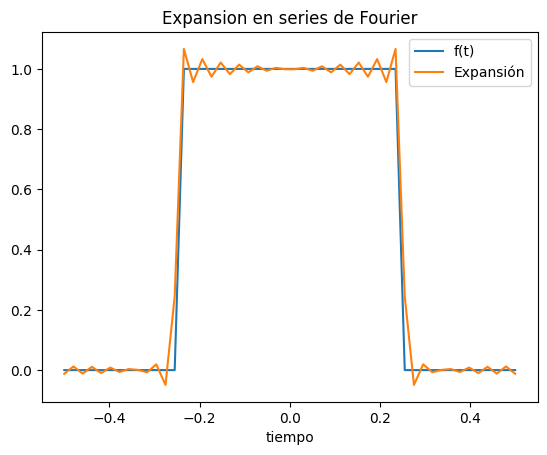

In [19]:

#Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

#Definir variables simbolicas

n= sym.symbols("n ",real=True)
t= sym.symbols("t ",real=True)

#Definir función periódica
Tmin = -1/2
Tmax = 1/2
T =  Tmax - Tmin #Definimos el periodo
wo=(2*np.pi)/T #Definimos el omega

x=sym.Heaviside(t+1/4)-sym.Heaviside(t-1/4) #Definimos la función

#Calculamos los coeficientes de fourier

f_integrar = x #Funcion que vamos a integrar
a0 = (2/T)*(sym.integrate(f_integrar,(t,-1/4,1/4))) #hallamos a0
print("a0= ")
sym.pprint(a0) #imprimir desde sympy

#calculamos la integral para an
f_integrar = x*sym.cos(n*wo*t) #Funcion que vamos a integrar
an= (4/T)*sym.integrate(f_integrar,(t,0,1/4)) #hallamos an
an= sym.simplify(an)
print("an = ")
sym.pprint(an)

#calculamos la integral para bn
f_integrar = x*sym.sin(n*wo*t) #Funcion que vamos a integrar
bn= (2/T)*sym.integrate(f_integrar,(t,-1/4,1/4)) #hallamos bn
bn= sym.simplify(bn)
print("bn = ")
sym.pprint(bn)

#Usando los coeficientes, representamos la expansión en series de Fourier

#Definimos el número de armónicos para la expansión
serie = 0
Armonicos = 25

for i in range(1, Armonicos+1):

  an_c = an.subs(n,i)
  if abs(an_c) <0.0001: an_c = 0 #Términos coseno de la serie

  serie= serie + an_c*sym.cos(i*wo*t)


serie= a0/2 + serie #Expansión final de la serie

print("f(t)= ")
sym.pprint(serie)

#Graficamos la función periódica original y su expansión en series de Fourier

# Convertimos la expresión Sympy a una función evaluable
fserie = sym.lambdify(t,serie)
f=sym.lambdify(t,x)

#Creamos un vector de tiempo para la gráfica
v_tiempo= np.linspace(Tmin, Tmax, 50)

#Evaluamos las funciones
fserieG= fserie(v_tiempo)
fG= f(v_tiempo)

plt.plot(v_tiempo, fG, label = "f(t)")
plt.plot(v_tiempo, fserieG, label= "Expansión")

plt.xlabel("tiempo")
plt.legend()
plt.title("Expansion en series de Fourier")
plt.show()


